# Analisis de sentimientos de Twitter

## Importamos las liberias

In [ ]:
%%capture
#La importación es importante que sea v4.10.1 para evitar problemas
!pip install tweepy==4.10.1
!pip install -U textblob
!pip install openpyxl
!pip install urlvalidator

In [ ]:
import tweepy
import requests
import matplotlib.pyplot as plt
import pandas as pd
import json
import configparser
import openpyxl

from google.colab import files
from textblob import TextBlob
from openpyxl import Workbook as wb
from openpyxl.styles import PatternFill, Border, Side, Alignment, Protection, Font

### Credenciales

Para no almacenar los token de accesso de la API de twitter, creamos un `.json` en cual lo subiremos las keys con el formato correspondiente sin tener que almecenar. https://developer.twitter.com/en/portal/dashboard

```json
{
  "Twitter": {
    "consumer_key": "<tu-token>",
    "consumer_secret": "<tu-token>",
    "access_token": "<tu-token>",
    "access_token_secret": "<tu-token>",
    "bearer_token": "<tu-token>"
  }
}
```

In [ ]:
keys_temple ={
    "Twitter": {
        "consumer_key": "<tu-token>",
        "consumer_secret": "<tu-token>",
        "access_token": "<tu-token>",
        "access_token_secret": "<tu-token>",
        "bearer_token": "<tu-token>"
    }
}

# creamos un .json y nos descargamos el archivo con el keys_temple
with open('keys_temple.json', 'w') as f:
    json.dump(keys_temple, f, indent=4)

files.download("keys_temple.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Le pasamos el archivo que hemos creado anteriormente

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving keys.json to keys.json


Una vez subido el archivo lo leemos y lo pasamos a las variables. 
La variable "uploaded" es un diccionario donde se espera que contenga los nombres de los archivos subidos, y "keys" es una variable donde se almacenará el contenido del archivo JSON una vez cargado.

In [ ]:
for fn in uploaded.keys():
  with open(fn) as f:
      keys = json.load(f)

In [ ]:
consumer_key = keys['Twitter']['consumer_key']
consumer_secret = keys['Twitter']['consumer_secret']

access_token = keys['Twitter']['access_token']
access_token_secret= keys['Twitter']['access_token_secret']

bearer_token = keys['Twitter']['bearer_token']


### Conecxión con la API

In [ ]:
client = tweepy.Client( bearer_token=bearer_token, 
                        consumer_key=consumer_key, 
                        consumer_secret=consumer_secret, 
                        access_token=access_token, 
                        access_token_secret=access_token_secret, 
                        return_type = requests.Response,
                        wait_on_rate_limit=True)

## Hacemos la query a twitter

In [ ]:
profile = input("Cuenta de twitter a buscar: ")

Cuenta de twitter a buscar: giantsgaming


In [ ]:
query = f'from: {profile}'

# Numero máx. 100 tweets
tweets = client.search_recent_tweets(query=query, tweet_fields=['context_annotations', 'created_at'], max_results=25)

## Pasamos la respuesta de twitter a un dataframe

In [ ]:
# Lo guardamos en un diccionario
tweets_dict = tweets.json() 

# Extramos Data
tweets_data = tweets_dict['data'] 

# Y lo normalizamos a un DF 
df = pd.json_normalize(tweets_data) 

df

,context_annotations,id,edit_history_tweet_ids,text,created_at
0,"[{'domain': {'id': '46', 'name': 'Business Tax...",1617975055543304193,[1617975055543304193],RT @GiantsXTRA: Peleamos hasta el final pero n...,2023-01-24T19:58:08.000Z
1,"[{'domain': {'id': '10', 'name': 'Person', 'de...",1617954575289548801,[1617954575289548801],@BISONSECLUB @Stend_lol @Attila @DecayLoL_ @al...,2023-01-24T18:36:45.000Z
2,"[{'domain': {'id': '46', 'name': 'Business Tax...",1617953806565900288,[1617953806565900288],¡Nos toca saltar a la arena! \n \nEncuentro im...,2023-01-24T18:33:42.000Z
3,"[{'domain': {'id': '46', 'name': 'Business Tax...",1617871134191661058,[1617871134191661058],RT @Fit1nho: Empieza la bootcamp para el torne...,2023-01-24T13:05:11.000Z
4,"[{'domain': {'id': '46', 'name': 'Business Tax...",1617841695634395136,[1617841695634395136],"Luchar, ver y crecer.\n\nEsta tarde, a las 20:...",2023-01-24T11:08:12.000Z
5,"[{'domain': {'id': '46', 'name': 'Business Tax...",1617565614452912130,[1617565614452912130],Esta cuesta de enero te la ponemos en modo fác...,2023-01-23T16:51:10.000Z
6,"[{'domain': {'id': '46', 'name': 'Business Tax...",1617530416835219457,[1617530416835219457],RT @burgerking_es: Escucha (nunca mejor dicho)...,2023-01-23T14:31:18.000Z
7,"[{'domain': {'id': '46', 'name': 'Business Tax...",1617485923721043968,[1617485923721043968],Hay personas destinadas a tener grandes faenas...,2023-01-23T11:34:30.000Z
8,"[{'domain': {'id': '46', 'name': 'Business Tax...",1617133444659650560,[1617133444659650560],"Escribe ""Valorant es"" en tu móvil y deja que e...",2023-01-22T12:13:52.000Z
9,"[{'domain': {'id': '46', 'name': 'Business Tax...",1617025716910006273,[1617025716910006273],RT @GiantsXTRA: ¡Top 13 final para @TheSisqui ...,2023-01-22T05:05:48.000Z


## Implementamos el TextBlob

Cambiamos el idioma de los mensajes a inglés y añadimos la polaridad positiva o negativa en porcentaje sobre 100

In [ ]:
# Traducciomos la columna de Es a En, ya que el modelo solo acepta texto al inglés
df['text_en'] = df['text'].apply(lambda x: TextBlob(x).translate(from_lang="es",to="en"))

In [ ]:
# añadimos la columna con el sentimiento
df['sentimientos'] = df['text_en'].apply(lambda x: TextBlob(str(x)).sentiment.polarity*100).round(2)

In [ ]:
df

,context_annotations,id,edit_history_tweet_ids,text,created_at,text_en,sentimientos
0,"[{'domain': {'id': '46', 'name': 'Business Tax...",1617975055543304193,[1617975055543304193],RT @GiantsXTRA: Peleamos hasta el final pero n...,2023-01-24T19:58:08.000Z,"(R, t, , @, g, i, a, n, t, s, x, t, r, a, :, ...",-20.00
1,"[{'domain': {'id': '10', 'name': 'Person', 'de...",1617954575289548801,[1617954575289548801],@BISONSECLUB @Stend_lol @Attila @DecayLoL_ @al...,2023-01-24T18:36:45.000Z,"(@, B, i, s, o, S, e, c, l, u, b, , @, S, t, ...",-40.00
2,"[{'domain': {'id': '46', 'name': 'Business Tax...",1617953806565900288,[1617953806565900288],¡Nos toca saltar a la arena! \n \nEncuentro im...,2023-01-24T18:33:42.000Z,"(W, e, , h, a, v, e, , t, o, , j, u, m, p, ...",52.00
3,"[{'domain': {'id': '46', 'name': 'Business Tax...",1617871134191661058,[1617871134191661058],RT @Fit1nho: Empieza la bootcamp para el torne...,2023-01-24T13:05:11.000Z,"(R, t, , @, f, i, t, 1, n, h, o, :, , B, o, ...",0.00
4,"[{'domain': {'id': '46', 'name': 'Business Tax...",1617841695634395136,[1617841695634395136],"Luchar, ver y crecer.\n\nEsta tarde, a las 20:...",2023-01-24T11:08:12.000Z,"(F, i, g, h, t, ,, , s, e, e, , a, n, d, , ...",43.33
5,"[{'domain': {'id': '46', 'name': 'Business Tax...",1617565614452912130,[1617565614452912130],Esta cuesta de enero te la ponemos en modo fác...,2023-01-23T16:51:10.000Z,"(T, h, i, s, , J, a, n, u, a, r, y, , s, l, ...",43.33
6,"[{'domain': {'id': '46', 'name': 'Business Tax...",1617530416835219457,[1617530416835219457],RT @burgerking_es: Escucha (nunca mejor dicho)...,2023-01-23T14:31:18.000Z,"(R, t, , @, b, u, r, g, e, r, k, i, n, g, _, ...",-25.00
7,"[{'domain': {'id': '46', 'name': 'Business Tax...",1617485923721043968,[1617485923721043968],Hay personas destinadas a tener grandes faenas...,2023-01-23T11:34:30.000Z,"(T, h, e, r, e, , a, r, e, , p, e, o, p, l, ...",21.43
8,"[{'domain': {'id': '46', 'name': 'Business Tax...",1617133444659650560,[1617133444659650560],"Escribe ""Valorant es"" en tu móvil y deja que e...",2023-01-22T12:13:52.000Z,"(W, r, i, t, e, , "", V, a, l, o, r, a, n, t, ...",0.00
9,"[{'domain': {'id': '46', 'name': 'Business Tax...",1617025716910006273,[1617025716910006273],RT @GiantsXTRA: ¡Top 13 final para @TheSisqui ...,2023-01-22T05:05:48.000Z,"(R, T, , @, g, i, a, n, t, s, x, t, r, a, :, ...",25.00


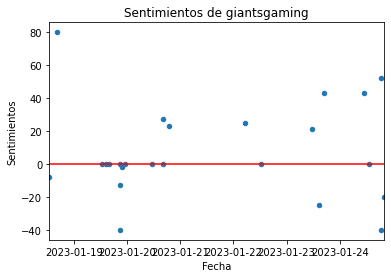

In [ ]:

first_date = df['created_at'].min()
last_date = df['created_at'].max()

df.plot.scatter(x='created_at', y='sentimientos')
plt.axhline(y=0, color='r', linestyle='-')
plt.title(f'Sentimientos de {profile}')
plt.xlabel('Fecha')
plt.ylabel('Sentimientos')
plt.xlim(first_date, last_date)
plt.show()

## Analisis

In [ ]:
def format_url_twit(profile,id_twit):
  return f'https://twitter.com/{profile}/status/{id_twit}'

In [ ]:
df_sentimientos = df.copy()
df_sentimientos['sentimientos'] = df_sentimientos['sentimientos'].apply(lambda x: str(x) + '%' if '%' not in str(x) else x)
df_sentimientos['url_twit'] = df_sentimientos.apply(lambda x: format_url_twit(profile, x['id']), axis=1)

df_sentimientos[['text','sentimientos', 'url_twit']]

,text,sentimientos,url_twit
0,RT @GiantsXTRA: Peleamos hasta el final pero n...,-20.0%,https://twitter.com/giantsgaming/status/161797...
1,@BISONSECLUB @Stend_lol @Attila @DecayLoL_ @al...,-40.0%,https://twitter.com/giantsgaming/status/161795...
2,¡Nos toca saltar a la arena! \n \nEncuentro im...,52.0%,https://twitter.com/giantsgaming/status/161795...
3,RT @Fit1nho: Empieza la bootcamp para el torne...,0.0%,https://twitter.com/giantsgaming/status/161787...
4,"Luchar, ver y crecer.\n\nEsta tarde, a las 20:...",43.33%,https://twitter.com/giantsgaming/status/161784...
5,Esta cuesta de enero te la ponemos en modo fác...,43.33%,https://twitter.com/giantsgaming/status/161756...
6,RT @burgerking_es: Escucha (nunca mejor dicho)...,-25.0%,https://twitter.com/giantsgaming/status/161753...
7,Hay personas destinadas a tener grandes faenas...,21.43%,https://twitter.com/giantsgaming/status/161748...
8,"Escribe ""Valorant es"" en tu móvil y deja que e...",0.0%,https://twitter.com/giantsgaming/status/161713...
9,RT @GiantsXTRA: ¡Top 13 final para @TheSisqui ...,25.0%,https://twitter.com/giantsgaming/status/161702...


### Descarga del archivo

In [ ]:
#Formateo del archivo
data_now = pd.to_datetime('now').strftime('%Y%m%d_%H%M%S')

format_name = f'{profile}_sentimientos_{data_now}.xlsx'

# descargar el dataframe en excel del google colab
df_sentimientos[['text', 'sentimientos', 'url_twit']].to_excel(format_name, index=False)

# NOTA: es importante cargar el archivo o si no lazará excepciones todo el rato
wb = openpyxl.load_workbook(format_name)
ws = wb.active

# Recorrer las celdas en la columna url_twit y agregar hipervínculos
for row in range(2, len(df_sentimientos) + 1):
    url_cell = f'C{row}'
    url = ws[url_cell].value
    ws[url_cell].hyperlink = url
    ws[url_cell].style = 'Hyperlink'
    ws[url_cell].value = ws[url_cell].value

# Guardar los cambios en el archivo Excel
wb.save(format_name)

files.download(format_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### ¿Cual es el mensaje más negativo?

In [ ]:
def get_sentiments_and_url(df_type):
    for i in range(len(df_type)):
        sentiment = df_type.iloc[i]['sentimientos']
        id_twit = df_type.iloc[i]['id']
        url = format_url_twit(profile, id_twit)
        print(f'{sentiment}%\t- {url}')

In [ ]:
# cual es el mensaje más negativo
tweets_min = df[df['sentimientos'] == df['sentimientos'].min()]

get_sentiments_and_url(tweets_min)

-40.0%	- https://twitter.com/giantsgaming/status/1617954575289548801
-40.0%	- https://twitter.com/giantsgaming/status/1616177291083530290


In [ ]:

number_min = int(input("Introduce un numero negativo: "))

Introduce un numero negativo: -40


In [ ]:
negative_sentiments = df[df['sentimientos'] <= number_min]

get_sentiments_and_url(negative_sentiments)

-40.0%	- https://twitter.com/giantsgaming/status/1617954575289548801
-40.0%	- https://twitter.com/giantsgaming/status/1616177291083530290


### ¿Cual es el mensaje más positivo

In [ ]:
# cual es el mensaje más positivo
twit_max = df[df['sentimientos'] == df['sentimientos'].max()]

get_sentiments_and_url(twit_max)

80.0%	- https://twitter.com/giantsgaming/status/1615742560965722120
